# PEW Survey Analysis – Solo Project by Aman Gill

This notebook analyzes survey responses from the September 2020 PEW dataset. The goal is to uncover how age and income influence American opinions on international relations, specifically regarding Germany vs. China, incorporating the usage of data cleaning, imputation, and visualization.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import files
uploaded = files.upload()

Saving Solo Project 1 Data Student Fall 2024.xlsx to Solo Project 1 Data Student Fall 2024 (2).xlsx


In [30]:
df = pd.read_excel("Solo Project 1 Data Student Fall 2024.xlsx", sheet_name='Data')
df.columns = df.columns.str.strip()
df.head()

,mstatus,totper,adults,parent,age,age group*,educ,income,income group,hispanic,...,Q4,Q5a,Q5b,Q5c,Q5d,Q5e,Q5f,Q6,Unnamed: 27,Unnamed: 28
0,Married,2,2,Yes,53,50-64,"Some college, no degree (includes community co...","$40,000 but less than $50,000",Low Income,Yes,...,Somewhat likely,"Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner",Everything will be the same as before the crisis,NaN,NaN
1,Married,5,2,Yes,48,30-49,4 year college or university degree/Bachelor.s...,"$100,000 and over (Unspecified)",High Income,No,...,Somewhat unlikely,"Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner",Countries will cooperate more with other count...,NaN,NaN
2,Widowed,3,3,Yes,74,65+,4 year college or university degree/Bachelor.s...,"$75,000 but less than $100,000",Middle Income,No,...,Somewhat likely,"Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner",Countries will cooperate more with other count...,NaN,NaN
3,"Single, that is never married",3,3,Yes,78,65+,"Some college, no degree (includes community co...","$25,000 but less than $30,000",Low Income,No,...,Very likely,"Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner","Yes, as a partner",Countries will increase their focus on nationa...,NaN,NaN
4,Married,5,2,Yes,31,30-49,2 year associate degree from a college or univ...,"$75,000 but less than $100,000",Middle Income,No,...,Somewhat likely,"Yes, as a partner","Yes, as a partner","Yes, as a partner","No, not a partner","Yes, as a partner","No, not a partner",Everything will be the same as before the crisis,NaN,NaN


## Variable Classification

Below are the classifications for a few sample variables:

- `mstatus`: Categorical (Nominal)  
- `totper`, `adults`, `age`: Numerical (Ratio)  
- `educ`, `income`, `polview`: Categorical (Ordinal)  
- `Q3b`: Categorical (Ordinal)  


In [31]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Unnamed: 28,1009
Unnamed: 27,1009
age group*,3
income group,3
parent,1
hispanic,1
race,1
educ,1
income,1
polview,1


## Missing Value Handling

We impute:
- Categorical variables: with **mode**
- Numerical variables: with **median**


In [32]:
df['parent'].fillna(df['parent'].mode()[0], inplace=True)
df['partyln'].fillna(df['partyln'].mode()[0], inplace=True)

<ipython-input-32-a4ec60c47275>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parent'].fillna(df['parent'].mode()[0], inplace=True)
<ipython-input-32-a4ec60c47275>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [33]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [34]:
bins = [17, 29, 49, 64, df['age'].max()]
labels = ['18–29', '30–49', '50–64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df[['age', 'age_group']].head()


,age,age_group
0,53.0,50–64
1,48.0,30–49
2,74.0,65+
3,78.0,65+
4,31.0,30–49


In [36]:
df['Q3b'] = df['Q3b'].astype(str)

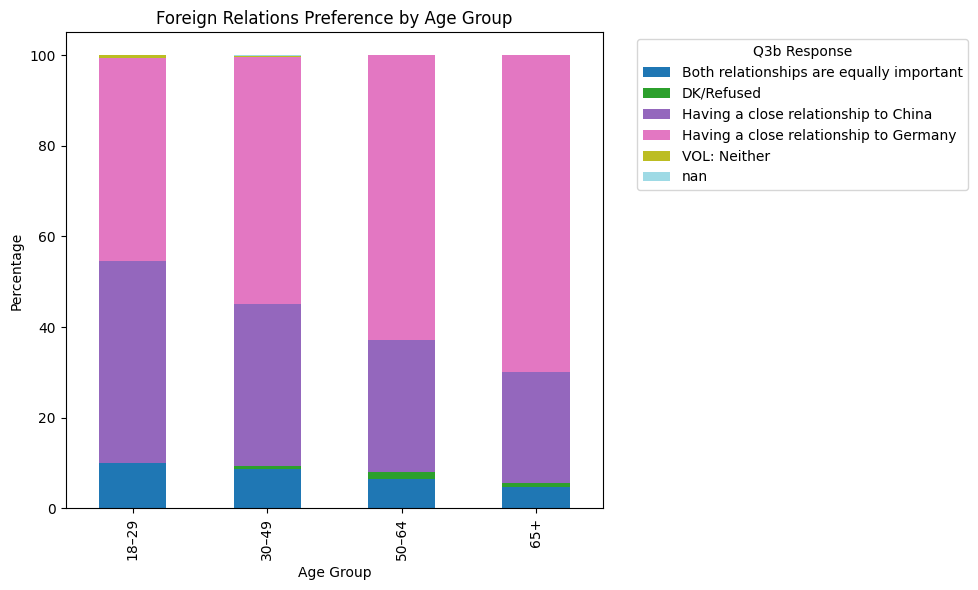

In [37]:
age_q3b = pd.crosstab(df['age_group'], df['Q3b'], normalize='index') * 100

age_q3b.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Foreign Relations Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Q3b Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insight: Age & Foreign Relations

This 100% stacked bar chart shows that the 18–29 age group expresses a stronger preference for closer relations with China compared to older age groups, who are more aligned with Germany. The trend shifts consistently with age, validating the claim that younger Americans lean toward China in international relations.


In [38]:
def income_group(val):
    if isinstance(val, str):
        if "Less than" in val or "10,000" in val or "20,000" in val or "30,000" in val or "40,000" in val or "50,000" in val:
            return "Low Income"
        elif "50,000" in val or "60,000" in val or "70,000" in val or "80,000" in val or "90,000" in val:
            return "Middle Income"
        elif "100,000" in val or "150,000" in val or "200,000" in val:
            return "High Income"
    return "Other"

df['income_group'] = df['income'].apply(income_group)
df['income_group'].value_counts()


,count
income_group,
Low Income,675
High Income,203
Other,132


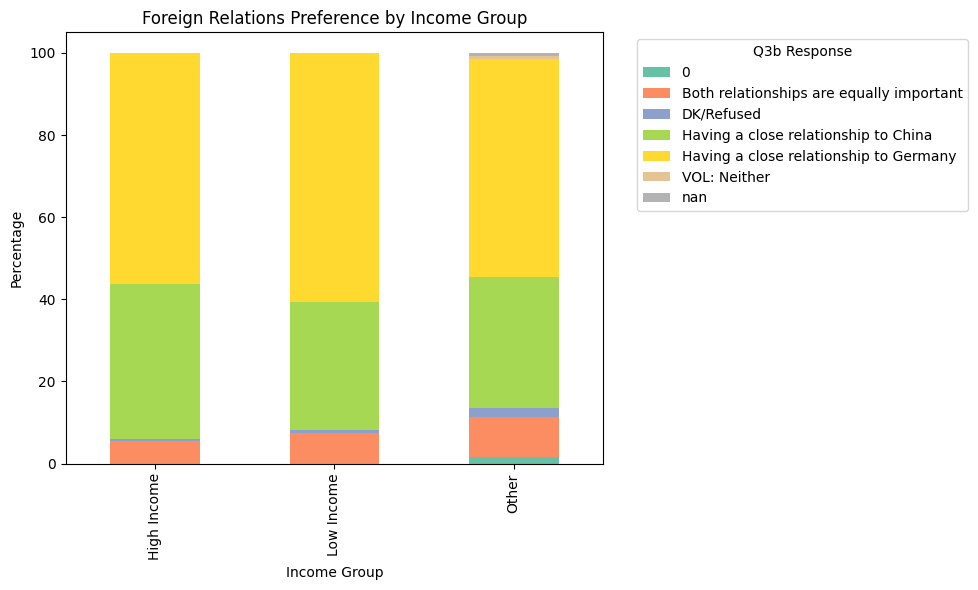

In [39]:
income_q3b = pd.crosstab(df['income_group'], df['Q3b'], normalize='index') * 100

income_q3b.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Foreign Relations Preference by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Percentage')
plt.legend(title='Q3b Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight: Income & Foreign Relations

This visualization reveals that Middle and High Income groups show a stronger preference for closer relations with Germany. In contrast, Low Income respondents appear more evenly split between China and Germany. Including “Refused” and “Don't Know” responses further enriches the analysis with nuanced patterns across income levels.
